In [1]:
!pip install hyperopt

In [2]:
!pip install bayesian-optimization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/YT/main/titanic.csv")
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [7]:
df.drop(['Cabin'], axis=1, inplace=True)

In [8]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

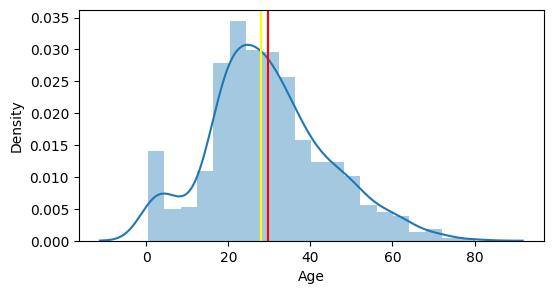

In [9]:
plt.figure(figsize=(6,3))
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='red')
plt.axvline(df.Age.median(), color='yellow')
plt.show()

In [10]:
df.Age.fillna(df.Age.mean(), inplace=True)

In [11]:
df['FamilySize'] = df.SibSp + df['Parch'] + 1

In [12]:
df['GenderClass'] = df.apply(
    lambda x: 'child' if x['Age'] < 15 else x['Sex'], axis=1)

In [13]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [14]:
df.drop(['Sex','SibSp','Parch'], axis=1, inplace=True)

In [15]:
df = pd.get_dummies(df, columns=['Embarked', 'GenderClass'], drop_first=True)

# https://stackoverflow.com/questions/50176096/removing-redundant-columns-when-using-get-dummies

In [16]:
X = df.loc[:,df.columns!='Survived']

In [17]:
y = df.Survived

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
# Train and Testing Accuracy
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9873595505617978, 0.776536312849162)

In [22]:
# Load packages
import time
from scipy.stats import uniform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score

from hyperopt import hp, fmin, tpe
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [23]:
# Make scorer: accuracy
acc_score = make_scorer(accuracy_score)

In [24]:
# GridSearchCV
# param_grid = {'max_depth':[3,4,5,6,7,8,9,10],
#               'max_features':[0.8,0.9,1],
#               'learning_rate':[0.01,0.1,1],
#               'n_estimators':[80,100,120,140,150],
#               'subsample': [0.8,0.9,1]}

param_grid = {'max_depth':[3,4,5,6],
              'max_features':[0.8,0.9,1],
              'learning_rate':[0.01,0.1,1],
              'n_estimators':[80,100],
              'subsample': [0.8,0.9,1]}

grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, scoring=acc_score, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': [0.8, 0.9, 1],
                         'n_estimators': [80, 100],
                         'subsample': [0.8, 0.9, 1]},
             scoring=make_scorer(accuracy_score))

In [25]:
# RandomizedSearhCV
# param_rand = {'max_depth':[3,4,5,6,7,8,9,10],
#               'max_features':[0.8,0.9,1],
#               'learning_rate':[0.01,0.1,1],
#               'n_estimators':[80,100,120,140,150],
#               'subsample': [0.8,0.9,1]}

param_rand = {'max_depth':[3,4,5,6],
              'max_features':[0.8,0.9,1],
              'learning_rate':[0.01,0.1,1],
              'n_estimators':[80,100],
              'subsample': [0.8,0.9,1]}

# param_rand = {'max_depth':[3,4,5,],
#               'max_features':[0.8,0.9,1],
#               }

rand = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_rand, scoring=acc_score, cv=5)

rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': [0.8, 0.9, 1],
                                        'n_estimators': [80, 100],
                                        'subsample': [0.8, 0.9, 1]},
                   scoring=make_scorer(accuracy_score))

In [26]:
# RandomizedSearhCV
# param_rand = {'max_depth':[3,4,5,6,7,8,9,10],
#               'max_features':[0.8,0.9,1],
#               'learning_rate':[0.01,0.1,1],
#               'n_estimators':[80,100,120,140,150],
#               'subsample': [0.8,0.9,1]}

param_rand = {'max_depth':[3,4,5,6],
              'max_features':[0.8,0.9,1],
              'learning_rate':[0.01,0.1,1],
              'n_estimators':[80,100],
              'subsample': [0.8,0.9,1]}

# param_rand = {'max_depth':[3,4,5,],
#               'max_features':[0.8,0.9,1],
#               }

rand = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_rand, scoring=acc_score, cv=5)

rand.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': [0.8, 0.9, 1],
                                        'n_estimators': [80, 100],
                                        'subsample': [0.8, 0.9, 1]},
                   scoring=make_scorer(accuracy_score))

# Bayes_opt

In [27]:
# Gradient Boosting Machine
def gbm_cl_bo(max_depth, max_features, learning_rate, n_estimators, subsample):
    params_gbm = {}

    params_gbm['max_depth'] = round(max_depth)
    params_gbm['max_features'] = max_features
    params_gbm['learning_rate'] = learning_rate
    params_gbm['n_estimators'] = round(n_estimators)
    params_gbm['subsample'] = subsample

    scores = cross_val_score(GradientBoostingClassifier(random_state=123, **params_gbm),
                             X_train, y_train, scoring=acc_score, cv=5).mean()

    score = scores.mean()
    return score

In [28]:
# Run Bayesian Optimization
start = time.time()

params_gbm ={
    'max_depth':(3, 10),
    'max_features':(0.8, 1),
    'learning_rate':(0.01, 1),
    'n_estimators':(80, 150),
    'subsample': (0.8, 1)
}

gbm_bo = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=111)
gbm_bo.maximize(init_points=20, n_iter=4)

print('It takes %s minutes' % ((time.time() - start)/60))

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | 0.802     | 0.616     | 4.183     | 0.8872    | 133.8     | 0.8591    |
| 2         | 0.8161    | 0.1577    | 3.157     | 0.884     | 96.71     | 0.8675    |
| 3         | 0.6488    | 0.9908    | 4.664     | 0.8162    | 126.9     | 0.9242    |
| 4         | 0.802     | 0.2815    | 6.264     | 0.8237    | 85.18     | 0.9802    |
| 5         | 0.7866    | 0.796     | 8.884     | 0.963     | 149.4     | 0.9155    |
| 6         | 0.5434    | 0.8156    | 5.949     | 0.8055    | 111.8     | 0.8211    |
| 7         | 0.8006    | 0.819     | 7.884     | 0.9131    | 99.2      | 0.9997    |
| 8         | 0.8161    | 0.1467    | 7.308     | 0.897     | 108.4     | 0.9456    |
| 9         | 0.8021    | 0.3296    | 5.804     | 0.8638    | 146.3     | 0.9837    |
| 10        | 0.788     | 0.8157    | 3.239     | 0.98

In [29]:
params_gbm = gbm_bo.max['params']

params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])

params_gbm

{'learning_rate': 0.059194670474463015,
 'max_depth': 4,
 'max_features': 0.8093174365608405,
 'n_estimators': 93,
 'subsample': 0.9528240486176215}

# hyperopt

In [30]:
# Run Bayesian Optimization from hyperopt
start = time.time()

space_lr = {'max_depth': hp.randint('max_depth', 3, 10),
            'max_features': hp.uniform('max_features', 0.8, 1),
            'learning_rate': hp.uniform('learning_rate',0.01, 1),
            'n_estimators': hp.randint('n_estimators', 80,150),
            'subsample': hp.uniform('subsample',0.8, 1)}

def gbm_cl_bo2(params):
    params = {'max_depth': params['max_depth'],
              'max_features': params['max_features'],
              'learning_rate': params['learning_rate'],
              'n_estimators': params['n_estimators'],
              'subsample': params['subsample']}

    gbm_bo2 = GradientBoostingClassifier(random_state=111, **params)

    best_score = cross_val_score(gbm_bo2, X_train, y_train, scoring=acc_score, cv=5).mean()

    return 1 - best_score

gbm_best_param = fmin(fn=gbm_cl_bo2,
                space=space_lr,
                max_evals=24,
                rstate=np.random.default_rng(seed=42),
                algo=tpe.suggest)

print('It takes %s minutes' % ((time.time() - start)/60))

100%|██████████| 24/24 [00:37<00:00,  1.55s/trial, best loss: 0.16282872057519948]
It takes 0.6184117118517558 minutes


In [31]:
gbm_best_param

{'learning_rate': 0.04465323630276792,
 'max_depth': 5,
 'max_features': 0.9283237612451108,
 'n_estimators': 100,
 'subsample': 0.9965958950126605}

# Happy Learning